**Importing libraries**

In [ ]:
import networkx as nx
import math
import matplotlib.pyplot as plt

**Reading file**

In [ ]:
G=nx.read_edgelist("yeast.edgelist")

**Number of protein in network**

In [ ]:
len(list(G.nodes()))

6526

**Number of interaction edges in network**

In [ ]:
len(list(G.edges()))

532180

**Visualization of network**

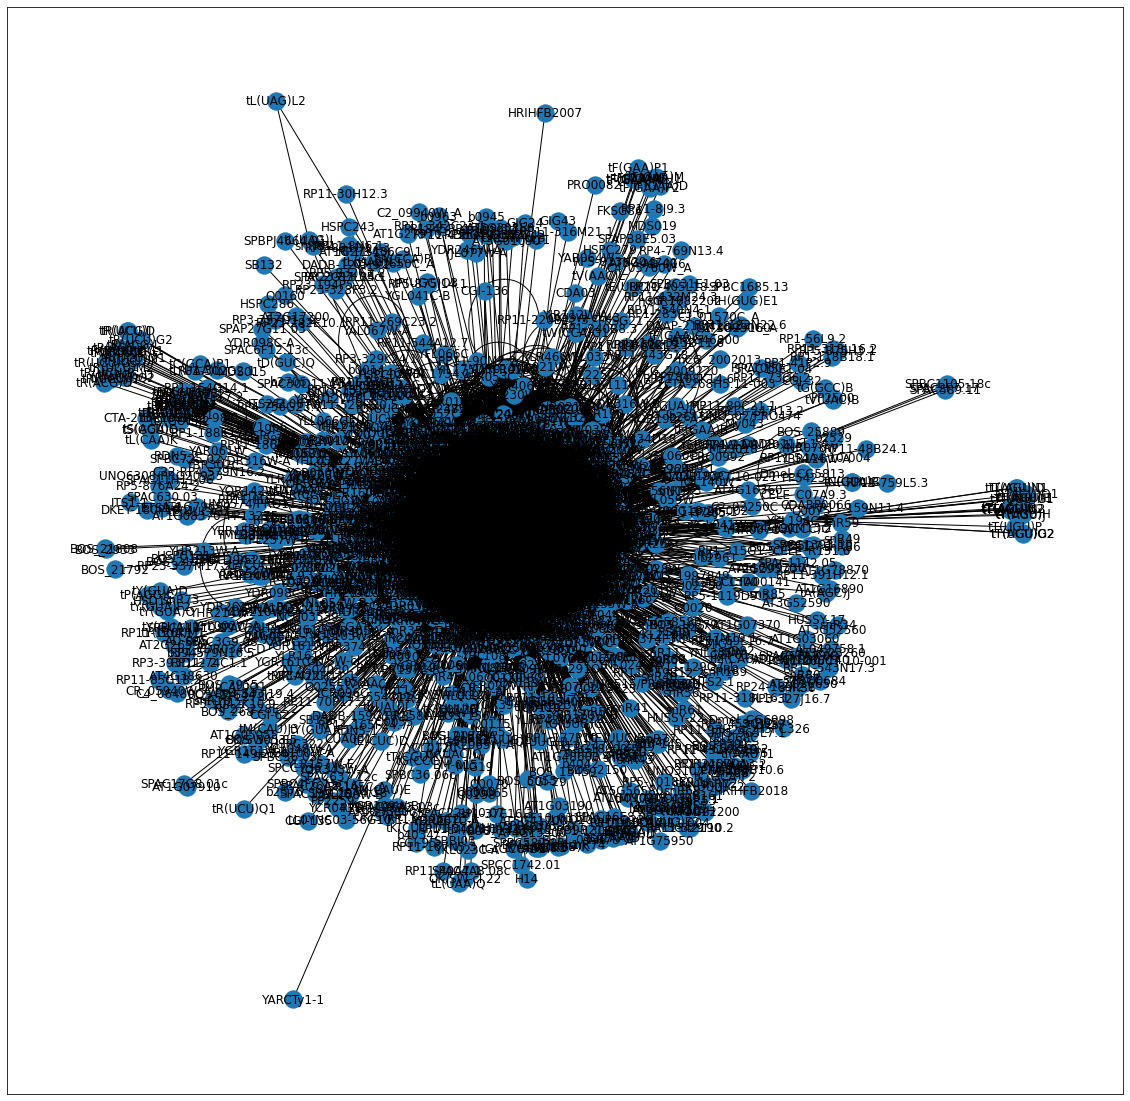

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G,with_labels=True)

**Adjacency Matrix**

In [ ]:
#Storing the graph's adjacency matrix in a numpy array
A = nx.adjacency_matrix(G).todense()

**Storing degree of each nodes in dictionary**

In [ ]:
#storing degree of all nodes in a dictionary
def node_degree(A):

  degree_of_nodes={}
  #dictionary
  #key : node index
  #value : degree value
  
  x=A.sum(axis=1).tolist()
  for i in range(len(x)):
    degree_of_nodes[i]=x[i][0]
  return degree_of_nodes

**PAC**

In [ ]:
def PAC_util(A,node,degree_of_nodes):
  mul_value=-999
  index=-100

  #adjacency list of node
  t=A[node].tolist()
  t=t[0]

  #finding out non connected node of passed node and calculating PAC 
  for each in range(len(t)):
    if t[each]==0 and ((degree_of_nodes[node]*degree_of_nodes[each])>mul_value):
      mul_value=degree_of_nodes[node]*degree_of_nodes[each]
      index= each
  return mul_value,index

**Calculating PAC score for a particular node**

In [ ]:
def PAC_of_node(A,degree_of_nodes):
  PAC_g={}
  #dictionary 
  #key : (node1,node2)
  #value : PAC value

  #store PAC value for each node in this format (node1,node2) : PAC score
  for node in range(len(A)):
    mul_val,index=PAC_util(A,node,degree_of_nodes)
    key_dict=(node,index)
    PAC_g[key_dict] = mul_val
  return PAC_g

**calculating PAC score for all nodes**

In [ ]:
def PAC_of_graph(A,degree_of_nodes):
  #get best predicted link or edge for each node based on highest PAC Score
  PAC_g= PAC_of_node(A,degree_of_nodes)
  
  #sort PAC_g based on PAC score
  x=sorted(PAC_g.items(), key = lambda x:x[1], reverse = True) 
  all_nodes_list = list(G.nodes())

  #filtering top 100 predicted link
  print("Top 100 Link predicted by PAC")
  for i in range(100):
    first_node = x[i][0][0]
    second_node = x[i][0][1]
    PAC_score = x[i][1]
    print(all_nodes_list[first_node],"   :   ",all_nodes_list[second_node],"  with PAC score ",PAC_score)
  return x[0:100]

In [ ]:
degree_of_nodes=node_degree(A)
all_nodes_list = list(G.nodes())


In [ ]:
PAC_output=PAC_of_graph(A,degree_of_nodes)

Top 100 Link predicted by PAC
YGL122C    :    YDL160C   with PAC score  9808398
YDL160C    :    YGL122C   with PAC score  9808398
YAL021C    :    YBR245C   with PAC score  5860132
YBR245C    :    YAL021C   with PAC score  5860132
YNL209W    :    YGL122C   with PAC score  5649724
YJR076C    :    YDL160C   with PAC score  4482702
YER125W    :    YDL160C   with PAC score  4457376
YOR198C    :    YAL021C   with PAC score  4279978
YFL039C    :    YBR245C   with PAC score  4271542
YFL034C-B    :    YFL039C   with PAC score  4014054
YNL255C    :    YAL021C   with PAC score  3970886
YKL212W    :    YDL160C   with PAC score  3878496
YLR320W    :    YDL160C   with PAC score  3864024
YHL034C    :    YAL021C   with PAC score  3797416
YLR039C    :    YDL160C   with PAC score  3784428
YNL181W    :    YDL160C   with PAC score  3769956
YMR272C    :    YDL160C   with PAC score  3690360
YER151C    :    YAL021C   with PAC score  3652332
YDR388W    :    YDL160C   with PAC score  3545640
YDR182W    :    YD

**Visualization of links predicted using PAC score**

In [ ]:
def number_to_name(all_nodes_list,edges):
  edges_new=[]
  for i in range(len(edges)):
    edges_new.append((all_nodes_list[edges[i][0]],all_nodes_list[edges[i][1]]))
  return edges_new
    

In [ ]:
def get_nodes(edges,all_nodes_list):
  nodes = []
  for each in edges:
    nodes.append(all_nodes_list[each[0]])
    nodes.append(all_nodes_list[each[1]])
  nodes = set(nodes)
  nodes = list(nodes)
  return nodes

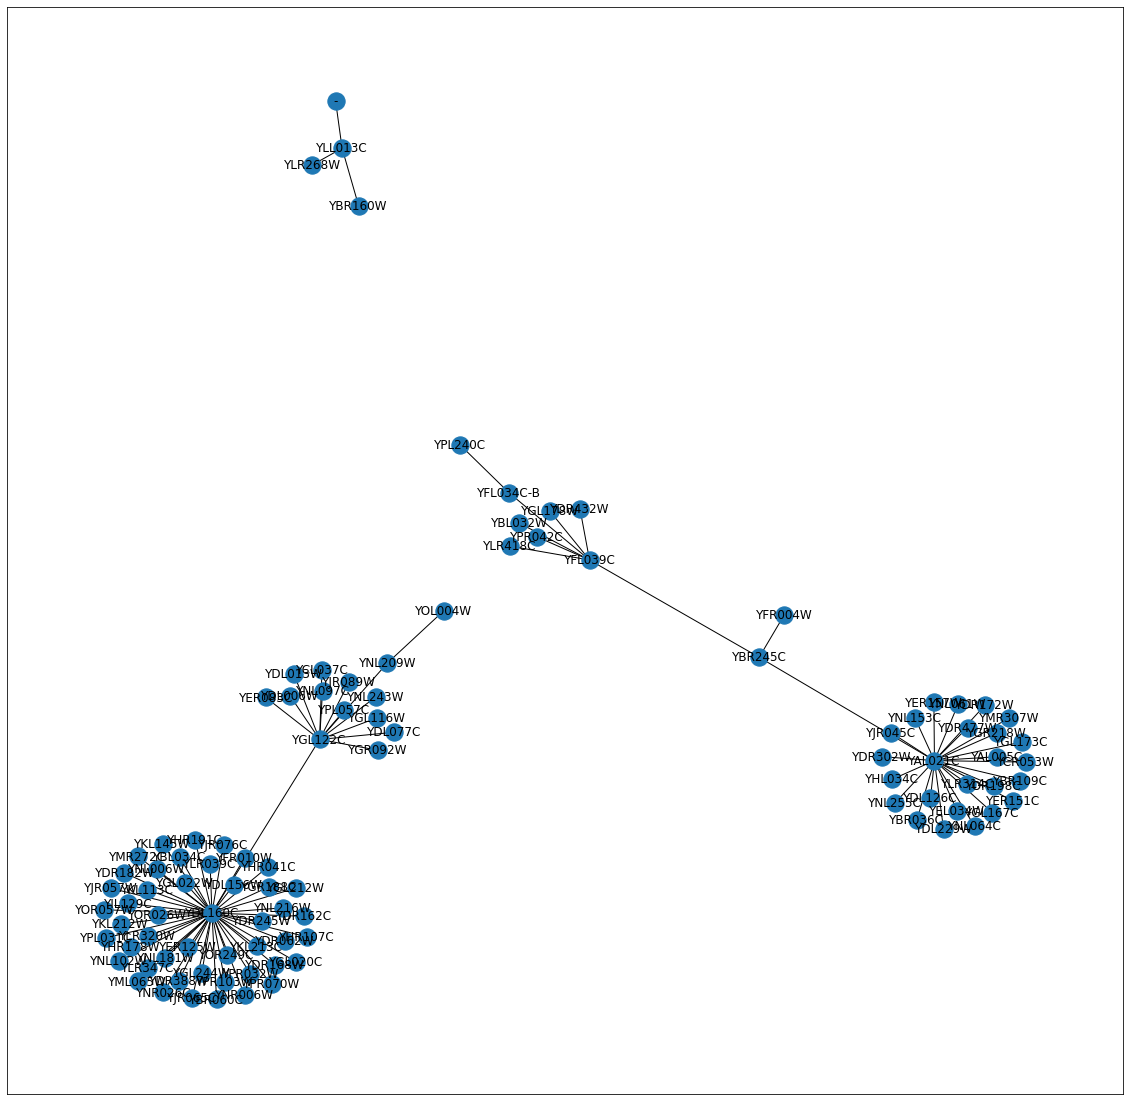

In [ ]:
#storing edges of top 50 links along with protein names 
PAC_edges = [PAC_output[i][0] for i in range(len(PAC_output))]
PAC_edges_new=number_to_name(all_nodes_list,PAC_edges)

#storing nodes of top 50 links along with protein names
PAC_nodes = get_nodes(PAC_edges,all_nodes_list)

#creating the PAC graph
PAC_graph = nx.Graph()
PAC_graph.add_nodes_from(PAC_nodes)
PAC_graph.add_edges_from(PAC_edges_new)

#visualization
plt.figure(figsize=(20,20))
nx.draw_networkx(PAC_graph)

**AAC(Adamic Adar coefficient)**

In [ ]:
def common_nei(first_node,second_node,A):
  #store common neighbors between first node and second node
  common_neighbours=[]
  
  #adjacency list of first node
  t1=A[first_node].tolist()
  t1=t1[0]

  #adjacency list of second node
  t2=A[second_node].tolist()
  t2=t2[0]

  #append common neighbors of first node and second node 
  for i in range(len(A)):
    if t1[i]==1 and t2[i]==1:
      common_neighbours.append(i)
  #return common neighbors between first node and second node
  return common_neighbours

def one_by_log_util(degree):
  #calculate 1/log(degree)
  if math.log10(degree)==0:
    return 0
  else:
    return round(1/math.log10(degree),4)

**Calculating AAC score for a particular node**

In [ ]:
def AAC_node(A,node1):   
  #dictionary of aac 
  # key :(node1,node2)
  # value:AAC score
  AAC_g={} 

  #adjacency list of node1
  t=A[node1].tolist()
  t=t[0]

  itr=0

  #find out first 100 not connected pair proteins with node1 
  for node2 in range(len(t)):
    if (t[node2]==0) and (node1!=node2):
      neighbour_list = common_nei(node1,node2,A)
      itr=itr+1
      if(itr==100):
        break
      sum=0.0
      if len(neighbour_list)==0:
        pass
      else:
        #calculate summation of 1/log(degree of common neighbors)
        for each in neighbour_list:
          sum=sum+one_by_log_util(degree_of_nodes[each])
      AAC_g[(node1,node2)]=sum
  
  return AAC_g

**calculating AAC for all nodes**

In [ ]:
def link_prediction_AAC(A):
  AAC_all={}
  #dictionary
  # key :(node1,node2)
  # value:AAC score
  #(node1,node2) : AAC score
  for i in range(len(A)):
    AAC_i = AAC_node(A,i)
    new=sorted(AAC_i.items(), key = lambda x:x[1], reverse = True) 
    AAC_all[new[0][0]]= new[0][1]
  return AAC_all


In [ ]:
def AAC_graph(A):
  #get predicted link or edge for each node
  AAC_all= link_prediction_AAC(A)

  #sort AAC_all
  x=sorted(AAC_all.items(), key = lambda x:x[1], reverse = True) 
  #ALL nodes name
  all_nodes_list = list(G.nodes())

  #filtering top 50 predicted link
  print("Top 50 Link predicted using AAC measure")
  for i in range(50):
    first_node = x[i][0][0]
    second_node = x[i][0][1]
    AAC_score = x[i][1]
    print(all_nodes_list[first_node],"   :   ",all_nodes_list[second_node]," with AAC score ",AAC_score)
  return x[0:50]

In [ ]:
AAC_output = AAC_graph(A)

Top 100 Link predicted using AAC measure
YDL160C    :    YLR039C  with AAC score  311.84230000000014
YAL021C    :    YLR039C  with AAC score  266.8051999999999
YFL039C    :    YLR418C  with AAC score  241.33800000000005
YNL209W    :    YLR418C  with AAC score  188.20390000000012
YGL122C    :    YDL105W  with AAC score  183.18869999999995
YFL034C-B    :    YLR039C  with AAC score  180.5216999999999
YLL013C    :    YLR418C  with AAC score  168.36490000000006
YNR051C    :    YOR244W  with AAC score  150.8902999999999
YBR160W    :    YOR244W  with AAC score  145.6188999999999
YPL240C    :    YOR244W  with AAC score  144.70250000000001
YJR076C    :    YLR418C  with AAC score  136.24120000000013
YHL034C    :    YLR418C  with AAC score  135.74630000000002
YLR268W    :    YOR244W  with AAC score  134.95469999999992
YER151C    :    YOR244W  with AAC score  132.1650999999999
YKL212W    :    YLR418C  with AAC score  126.99790000000014
YDL077C    :    YLR418C  with AAC score  126.45340000000016
YB

**Visualization of links predicted using AAC score**

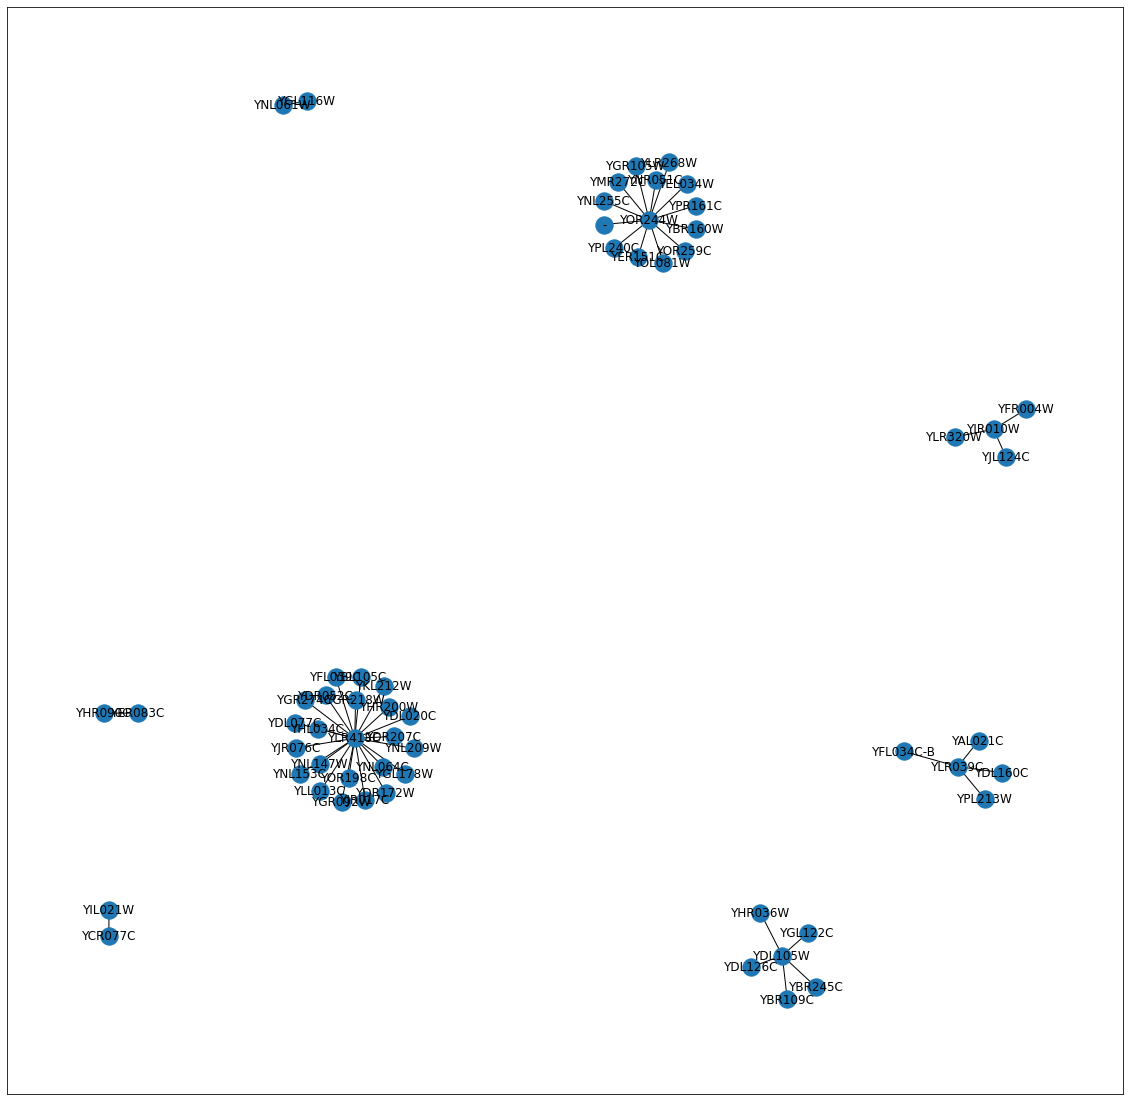

In [ ]:
#storing edges of top 50 links along with protein names 
AAC_edges = [AAC_output[i][0] for i in range(len(AAC_output))]
AAC_edges_new=number_to_name(all_nodes_list,AAC_edges)


#storing nodes of top 50 links along with protein names 
AAC_nodes = get_nodes(AAC_edges,all_nodes_list)

#creating the graph
AAC_graph = nx.Graph()
AAC_graph.add_nodes_from(AAC_nodes)
AAC_graph.add_edges_from(AAC_edges_new)

#visualization
plt.figure(figsize=(20,20))
nx.draw_networkx(AAC_graph)

**JAC**

In [ ]:
def JAC_coefficient(node1,node2,A):
  #adjacency list of node1
  t1=A[node1].tolist()
  t1=t1[0]

  #adjacency list of node2
  t2=A[node2].tolist()
  t2=t2[0]

  #appending neighbors of node1 to list1
  list1=[]
  for i in range(len(t1)):
    if t1[i]==1:
      list1.append(i)
  
  #appending neighbors of node2 to list2
  list2=[]
  for i in range(len(t2)):
    if t2[i]==1:
      list2.append(i)
  

  #finding union of list1 and list2
  union_list = list(set(list1) | set(list2))

  #finding intersection of list1 and list2
  intersection_list = list(set(list1) & set(list2))

  #if denominator length is 0 return 0
  if len(union_list)==0:
    return 0
  else:
    return float(len(intersection_list))/float(len(union_list))



**Calculating JAC score for a particular node**

In [ ]:
def JAC_util(A,node1):   
  JAC_g={} 
  #dictionary
  # key :(node1,node2)
  # value:JAC score

  #adjacency list of node1
  t=A[node1].tolist()
  t=t[0]
  itr=0

  #find out first 100 not connected pair proteins with node1
  for node2 in range(len(t)):
    if (t[node2]==0) and (node1!=node2):
      JAC_g[(node1,node2)]=JAC_coefficient(node1,node2,A)
      itr=itr+1
      if(itr==100):
        break
  x=sorted(JAC_g.items(), key = lambda x:x[1], reverse = True) 
  return x[0]


**Calculating JAC score for all nodes**

In [ ]:
def link_prediction_JAC(A):
  JAC_all={}
  for i in range(len(A)):
    JAC_i = JAC_util(A,i)
    JAC_all[(JAC_i[0][0],JAC_i[0][1])]=JAC_i[1]
  return JAC_all


def JAC_graph(A):
  all_nodes_list = list(G.nodes())
  #get predicted link for all nodes
  JAC_all_nodes = link_prediction_JAC(A)

  #sort JAC_all_nodes
  x=sorted(JAC_all_nodes.items(), key = lambda x:x[1], reverse = True) 

  #filtering top 50 predicted link
  print("Top 50 Link predicted using JAC measure")
  for i in range(50):
    first_node = x[i][0][0]
    second_node = x[i][0][1]
    JAC_value = x[i][1]
    print(all_nodes_list[first_node],"   :   ",all_nodes_list[second_node]," with JAC score :",JAC_value)
  return x[0:50]

In [ ]:
JAC_output = JAC_graph(A)

Top 100 Link predicted using JAC measure
YER111C    :    YDR334W  with JAC score : 0.2526621490803485
YPL017C    :    YLR381W  with JAC score : 0.24782608695652175
YGL127C    :    YPL129W  with JAC score : 0.2390057361376673
YOR141C    :    YHR090C  with JAC score : 0.23717217787913342
YMR288W    :    YLR147C  with JAC score : 0.22916666666666666
YFL039C    :    YLR418C  with JAC score : 0.22878504672897196
YML049C    :    YJR050W  with JAC score : 0.2225705329153605
YDR457W    :    YIR010W  with JAC score : 0.22202166064981949
YDR243C    :    YMR213W  with JAC score : 0.21923937360178972
YDR485C    :    YER164W  with JAC score : 0.21775147928994082
YDR434W    :    YJL091C  with JAC score : 0.21770682148040638
YNR051C    :    YOR244W  with JAC score : 0.21748878923766815
YDL020C    :    YLR418C  with JAC score : 0.21247429746401644
YGL163C    :    YCL061C  with JAC score : 0.21231766612641814
YLR116W    :    YLR117C  with JAC score : 0.21205357142857142
YNL026W    :    YIR010W  with JA

**Visualization of links predicted using JAC score**

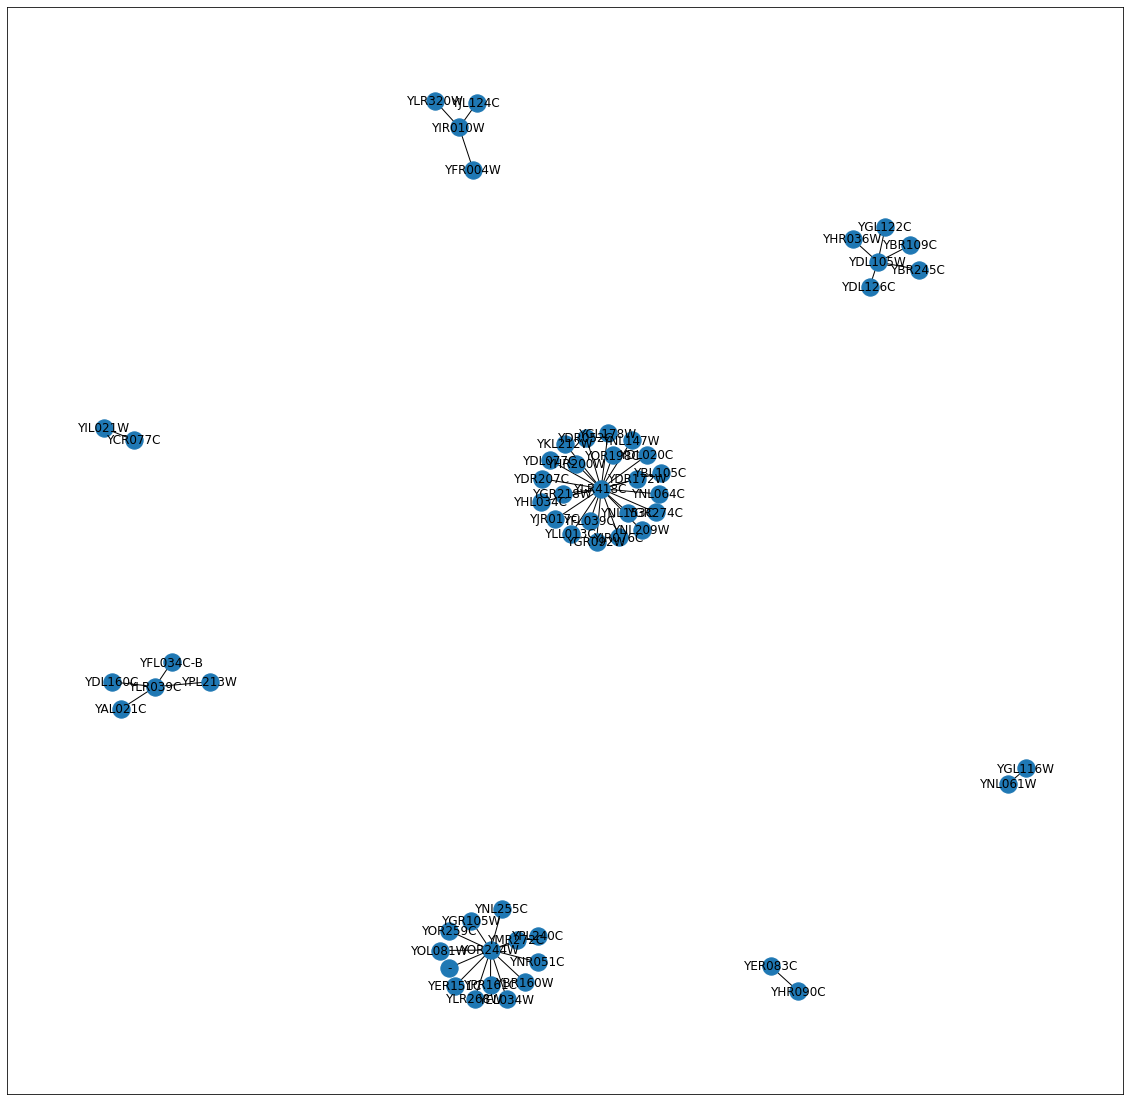

In [ ]:
#storing edges of top 50 links along with protein names 
JAC_edges = [JAC_output[i][0] for i in range(len(JAC_output))]
JAC_edges_new=number_to_name(all_nodes_list,JAC_edges)


#storing nodes of top 50 links along with protein names
JAC_nodes = get_nodes(JAC_edges,all_nodes_list)
JAC_graph = nx.Graph()

#creating the graph
JAC_graph.add_nodes_from(JAC_nodes)
JAC_graph.add_edges_from(JAC_edges_new)

#visualization
plt.figure(figsize=(20,20))
nx.draw_networkx(AAC_graph)